(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week05/notebook/demo.ipynb)

We will work with the Titanic datasets from Kaggle.
https://www.kaggle.com/competitions/titanic/data
- **The Titanic** https://en.wikipedia.org/wiki/Titanic

| Variable   | Definition                                | Key                                  |
|------------|-------------------------------------------|--------------------------------------|
| survival   | Survival                                 | 0 = No, 1 = Yes                     |
| pclass     | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex        | Sex                                      |                                      |
| Age        | Age in years                             |                                      |
| sibsp      | # of siblings / spouses aboard the Titanic |                                      |
| parch      | # of parents / children aboard the Titanic |                                      |
| ticket     | Ticket number                            |                                      |
| fare       | Passenger fare                           |                                      |
| cabin      | Cabin number                             |                                      |
| embarked   | Port of Embarkation                     | C = Cherbourg, Q = Queenstown, S = Southampton |


# 1. Loading the data

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5,B39,C
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


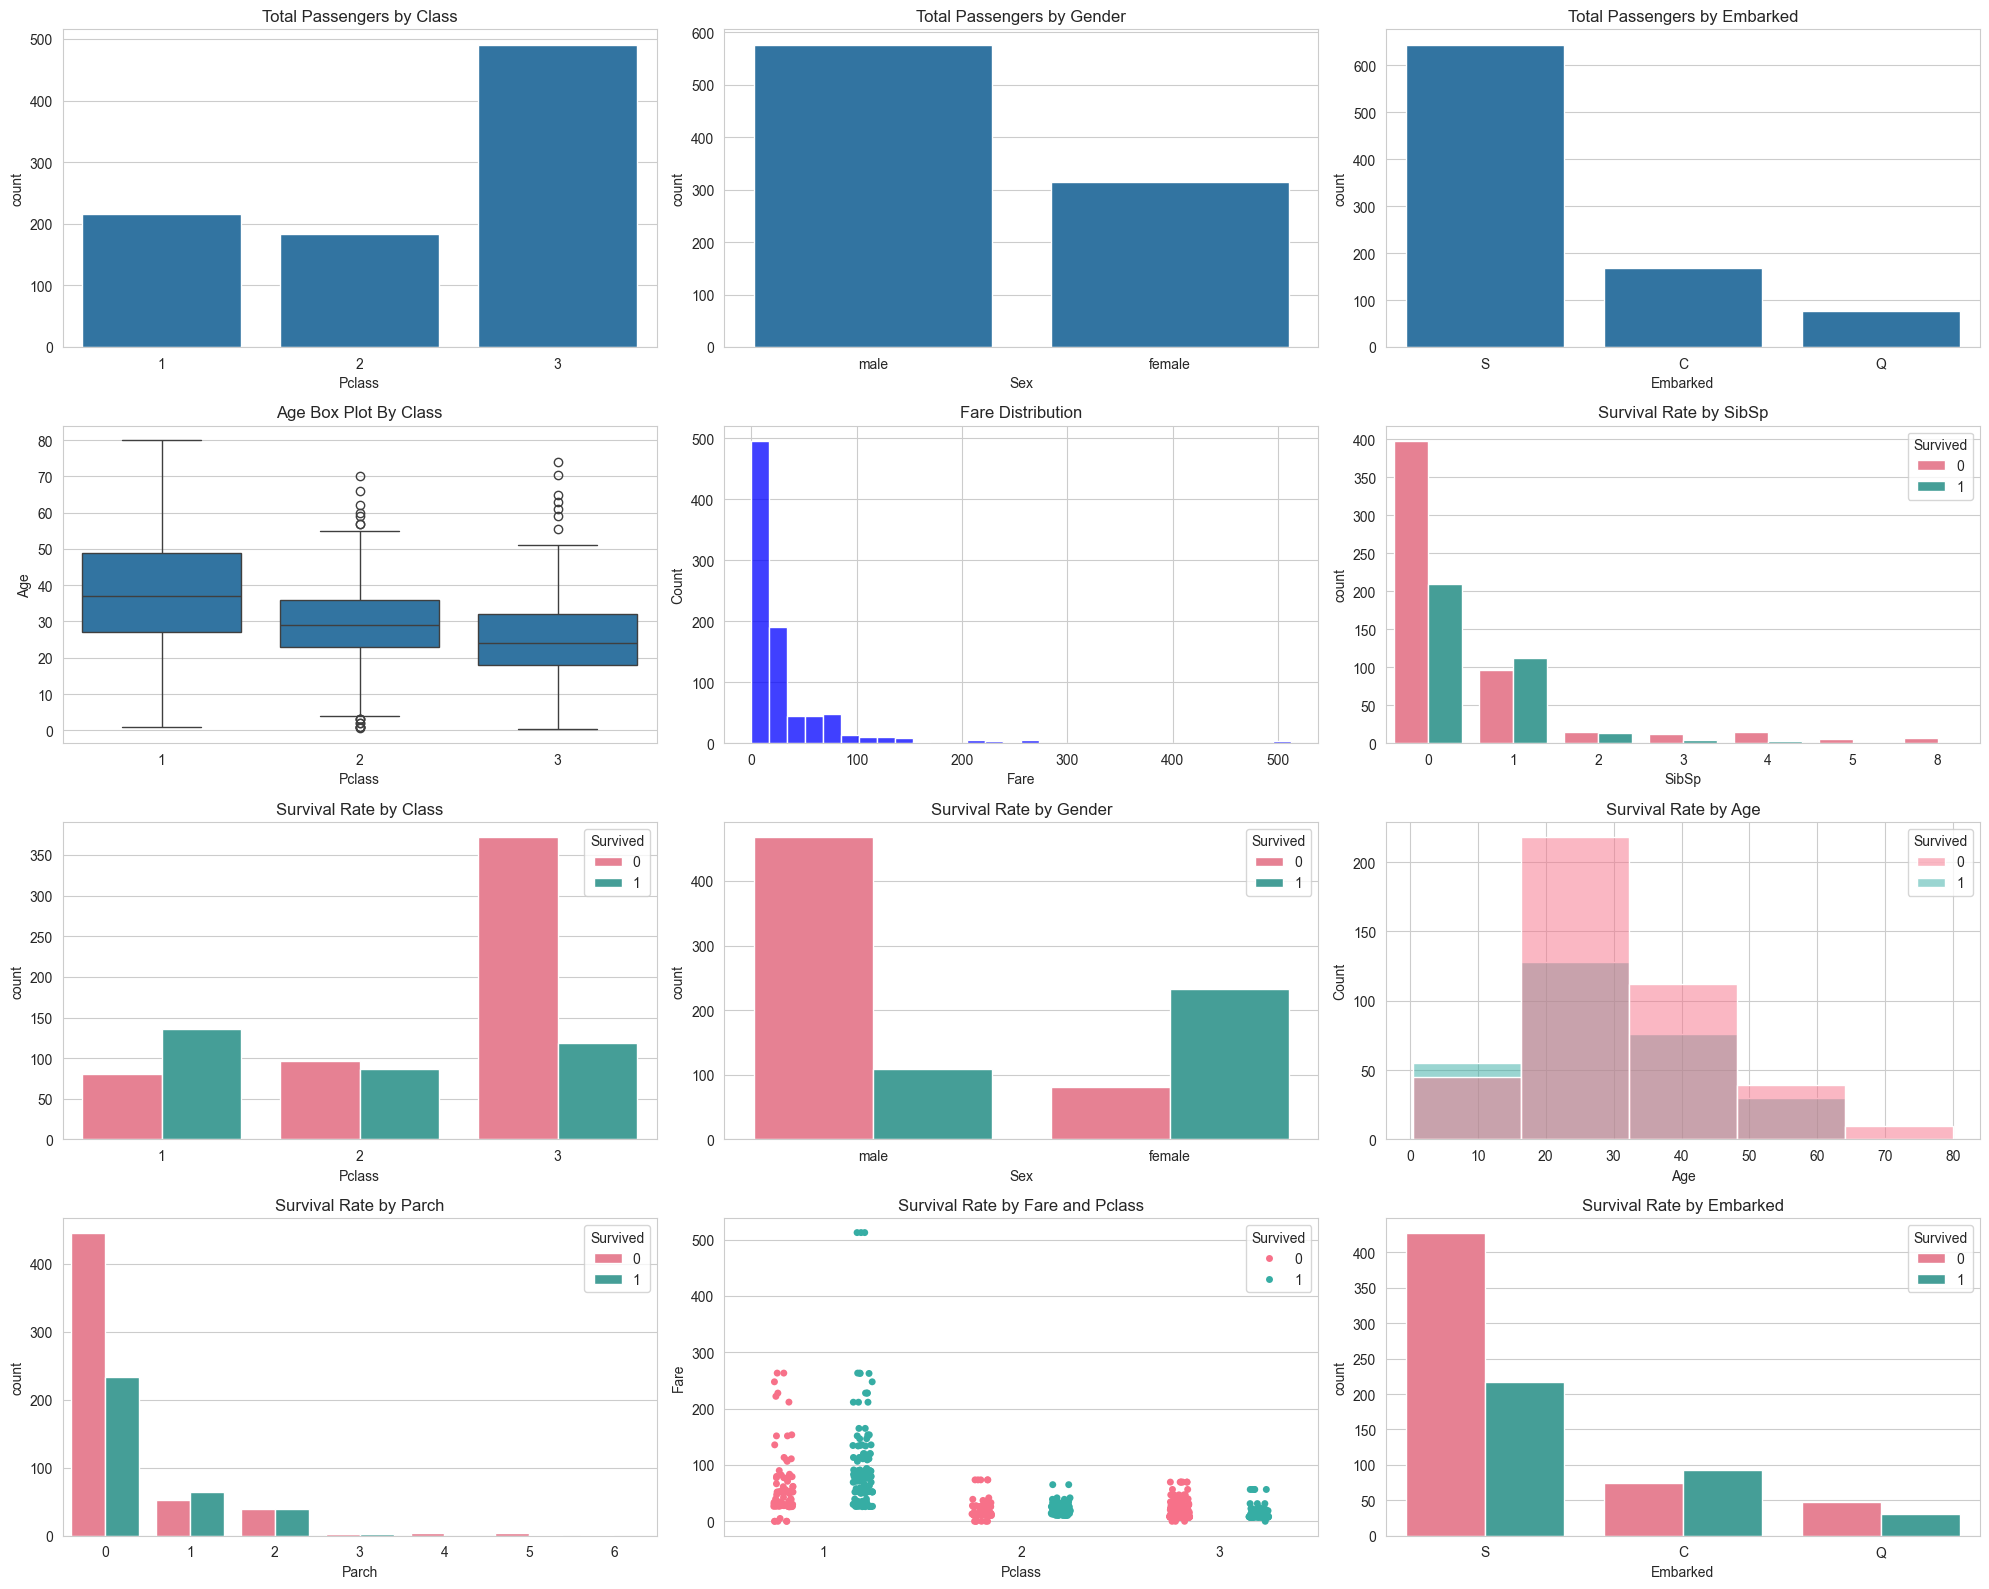

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Define color palette for consistency
palette = "husl"

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 16))

# 1st row
sns.countplot(x='Pclass', data=train, ax=axes[0, 0])
sns.countplot(x='Sex', data=train, ax=axes[0, 1])
sns.countplot(x='Embarked', data=train, ax=axes[0, 2])

# 2nd row
sns.boxplot(x='Pclass', y='Age', data=train, ax=axes[1, 0])
sns.histplot(train['Fare'].dropna(), ax=axes[1, 1], bins=30, color='b')
sns.countplot(x='SibSp', hue='Survived', data=train, ax=axes[1,2], palette=palette)

# 3rd row
sns.countplot(x='Pclass', hue='Survived', data=train, ax=axes[2, 0], palette=palette)
sns.countplot(x='Sex', hue='Survived', data=train, ax=axes[2, 1], palette=palette)
sns.histplot(x='Age', hue='Survived', data=train, ax=axes[2, 2], bins=5, palette=palette)

# 4th row
sns.countplot(x='Parch', hue='Survived', data=train, ax=axes[3, 0], palette=palette)
sns.stripplot(x='Pclass', y='Fare', hue='Survived', data=train, palette=palette, ax=axes[3, 1], jitter=True, dodge=True)
sns.countplot(x='Embarked', hue='Survived', data=train, ax=axes[3, 2], palette=palette)

# Set titles for each subplot
titles = [
    "Total Passengers by Class", 
    "Total Passengers by Gender", 
    "Total Passengers by Embarked", 
    "Age Box Plot By Class", 
    "Fare Distribution", 
    "Survival Rate by SibSp",
    "Survival Rate by Class", 
    "Survival Rate by Gender", 
    "Survival Rate by Age", 
    "Survival Rate by Parch",
    "Survival Rate by Fare and Pclass", 
    "Survival Rate by Embarked"
]

# Assign titles correctly
for ax, title in zip(axes.flat, titles):
    ax.set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()


# 2. Exploratory Data Analysis

## 2.0 Quick survey across key variables

- Some quick analysis across key columns is usually a good starting point to help understand the data.
- **Domain knowledge and common sense are important too!!**

In [8]:
# convert all column names to lower cases
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# how many are survived, also include the corresponding % out of the total

dist_survived_train = train.groupby('survived')['passengerid'].count().reset_index()
dist_survived_train['percentage'] = (dist_survived_train['passengerid'] / len(train)).map(lambda x: round(x, 4))
dist_survived_train

,survived,passengerid,percentage
0,0,549,0.6162
1,1,342,0.3838


It's good to know that the train and test datasets have consistent data distributions!!

In [11]:
# train['pclass'].head(5)
train.groupby('pclass')['passengerid'].count().reset_index()

,pclass,passengerid
0,1,216
1,2,184
2,3,491


In [12]:
test.groupby('pclass')['passengerid'].count().reset_index()

,pclass,passengerid
0,1,107
1,2,93
2,3,218


The variable `Pclass` here represents the passenger class, which indicates the socio-economic status (SES) of the passenger based on their ticket type.

| Pclass | Description   | Socio-Economic Status     |
|--------|-------------|--------------------------|
| 1      | First Class  | Upper Class (Wealthy)    |
| 2      | Second Class | Middle Class             |
| 3      | Third Class  | Lower Class (Poorer)     |

- First class passengers were given priority boarding, access to a higher deck, and potentially the priority in evacuation
- Third class passengers were mostly in lower deck areas, making it harder to reach lifeboats

![](https://rpmarchildon.com/wp-content/uploads/2018/06/titanic_class_cabin_locations.png)

In [13]:
# let pandas display all rows instead of hidding

pd.set_option('display.max_rows', None)

train.groupby(['pclass','embarked'])['passengerid'].count().reset_index()

,pclass,embarked,passengerid
0,1,C,85
1,1,Q,2
2,1,S,127
3,2,C,17
4,2,Q,3
5,2,S,164
6,3,C,66
7,3,Q,72
8,3,S,353


C = Cherbourg, Q = Queenstown, S = Southampton

![](https://d.newsweek.com/en/full/2248395/titanic-journey.jpg?w=1200&f=ea15a8ece59fe5cc42a6ab06fb1fb672)

In [14]:
train.groupby('embarked')['passengerid'].count().reset_index()

,embarked,passengerid
0,C,168
1,Q,77
2,S,644


In [15]:
# The cabin variable
train['cabin'].head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: cabin, dtype: object

![](https://www.titanicandco.com/titanic/images/deckplan1.jpg)

In [16]:
dist_sex_train = train.groupby(['sex'])['passengerid'].count().reset_index()
dist_sex_train['percentage'] = (dist_sex_train['passengerid'] / len(train)).map(lambda x: '{:.2%}'.format(x))
dist_sex_train

,sex,passengerid,percentage
0,female,314,35.24%
1,male,577,64.76%


In [17]:
dist_sex_test = test.groupby(['sex'])['passengerid'].count().reset_index()
dist_sex_test['percentage'] = (dist_sex_test['passengerid'] / len(test)).map(lambda x: '{:.2%}'.format(x))
dist_sex_test

,sex,passengerid,percentage
0,female,152,36.36%
1,male,266,63.64%


In [18]:
# distribution of other numerical features
train[[
    'age',
    'sibsp',
    'parch',
    'fare'
]].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [19]:
test[[
    'age',
    'sibsp',
    'parch',
    'fare'
]].describe()

,age,sibsp,parch,fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


In [20]:
# ticket number??

train['ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: ticket, dtype: object

- Raw Ticket values are not directly useful because they are alphanumeric and contain no obvious numerical meaning.
- However, feature engineering can extract useful patterns that might impact survival probability.
- Possible insights:
  - Passengers with the same ticket number likely traveled together, which can indicate family or group survival dependencies.
  - Ticket prefixes might correlate with cabin class or embarkation location.

## 2.1 Outlier detection

![](https://miro.medium.com/v2/resize:fit:1400/1*0MPDTLn8KoLApoFvI0P2vQ.png)

In [21]:
import numpy as np
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
outliers_to_drop = detect_outliers(train,2,["age","sibsp","parch","fare"])
train.loc[outliers_to_drop] # Show the outliers rows

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
# Drop outliers
# train = train.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

## 2.2 Handle Missing values

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As can be seen above, there are missing values in the following columns:
- `Age`
- `Cabin`
- `Embarked`

Missing values are typically bad and need to be handled. However, some algorithms can handle missing values, such as decision trees.

In [24]:
# how to quickly locate columns with null values??
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [25]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

| Reason                                     | Who Is Affected?               |
|--------------------------------------------|--------------------------------|
| Poor record-keeping (pre-1912 era)         | Mostly third-class passengers  |
| Ticketing system didn’t require age        | Families, group travelers      |
| Crew members not consistently recorded     | Crew entries in the dataset    |
| Passengers may have hidden or omitted age  | Various                        |


In [ ]:
# fill the missing values in age with the median age
train['age'] = train['age'].fillna(train['age'].median())
test['age'] = test['age'].fillna(test['age'].median())

- First-class passengers had private cabins, which were recorded.
- Some second-class passengers also had assigned cabins, but not all.
- Most third-class passengers didn’t have individual cabins but instead stayed in large dormitory-style areas (especially in the lower decks).

In [ ]:
train['has_cabin'] = train['cabin'].notna().astype(int)
train.groupby('pclass')['has_cabin'].mean().reset_index()

,pclass,has_cabin
0,1,0.814815
1,2,0.086957
2,3,0.024440


## 2.3. Feature Engineering

Here are the general types of data we could encounter:
- **Categorical data**:
  - With ordinal relationships - e.g., ratings, grades
  - Without ordinal relationships - e.g., colors, brands
- **Numerical data**:
  - Discrete - e.g., number of children, number of votes
  - Continuous - e.g., height, weight, temperature

Ultimately, we want to convert all data into numerical data for computation, which means that we need to convert categorical data into numerical data.


### 2.3.1 Encode categorical variables

In [47]:
# Encoding ordinal variables

from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({'education': ['primary', 'secondary', 'tertiary', 'primary']})
encoder = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']])  # Define order

df['education_encoded'] = encoder.fit_transform(df[['education']])
df

,education,education_encoded
0,primary,0.0
1,secondary,1.0
2,tertiary,2.0
3,primary,0.0


In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_arr = encoder.fit_transform(df[['education']])
encoded_arr


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [49]:
df_encoded_arr = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names_out(['education']))
df_encoded_arr

,education_primary,education_secondary,education_tertiary
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0


### 2.3.2 Create meaningful features

In [ ]:
Survival = train['Survived']
Survival.describe()

In [ ]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train)
plt.show()

In [ ]:
train['name_length'] = train['Name'].apply(len)
sum_Name = train[["name_length", "Survived"]].groupby(['name_length'],as_index=False).sum()
average_Name = train[["name_length", "Survived"]].groupby(['name_length'],as_index=False).mean()
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
sns.barplot(x='name_length', y='Survived', data=sum_Name, ax = axis1)
sns.barplot(x='name_length', y='Survived', data=average_Name, ax = axis2)
sns.pointplot(x = 'name_length', y = 'Survived', data=train, ax = axis3)
plt.show()

In [ ]:
train.loc[ train['name_length'] <= 23, 'name_length'] = 0
train.loc[(train['name_length'] > 23) & (train['name_length'] <= 28), 'name_length'] = 1
train.loc[(train['name_length'] > 28) & (train['name_length'] <= 40), 'name_length'] = 2
train.loc[ train['name_length'] > 40, 'name_length'] = 3
train['name_length'].value_counts()

In [ ]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

In [ ]:
#plot distributions of age of passengers who survived or did not survive
sns.kdeplot(x='Age', data=train, hue='Survived', common_norm=False)
# sns.displot(x='Age', data=train, hue='Survived', kind='kde', common_norm=False)
plt.show()

In [ ]:

age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)
# Qcut is a quantile based discretization function to autimatically create categories (not used here)
# train['Age'] = pd.qcut(train['Age'], 6, labels=False)
# Using categories as defined above
train.loc[ train['Age'] <= 14, 'Age'] 						          = 0
train.loc[(train['Age'] > 14) & (train['Age'] <= 30), 'Age']        = 5
train.loc[(train['Age'] > 30) & (train['Age'] <= 40), 'Age']        = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 50), 'Age']        = 3
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age']        = 2
train.loc[ train['Age'] > 60, 'Age'] 							      = 4
train['Age'].value_counts()

In [ ]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
full_data = [train, test]

for dataset in full_data:
# Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
# Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Create new feature Boys from FamilySize
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
    
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

In [ ]:
sns.histplot(x='Fare', data=train, bins=30)
plt.show()

In [ ]:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Explore Fare distribution 
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

In [ ]:
# Apply log to Fare to reduce skewness distribution
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

In [ ]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare'] 						      = 0
#    dataset.loc[(dataset['Fare'] > 2.7) & (dataset['Fare'] <= 3.2), 'Fare']   = 1
#    dataset.loc[(dataset['Fare'] > 3.2) & (dataset['Fare'] <= 3.6), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare'] 							  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train['Fare'].value_counts()

In [ ]:
train.head(5)

In [ ]:
# Feature that tells whether a passenger had a cabin on the Titanic (O if no cabin number, 1 otherwise)
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

In [ ]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
for dataset in full_data:
# Remove all NULLS in the Embarked column
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot



In [ ]:
import re

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
# Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train, ax=axis1);

In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
# Mapping titles
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)
    
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

In [ ]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
train['Deck'].value_counts()

In [ ]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train)

In [ ]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
train.head(5)

In [ ]:
train.describe()

In [ ]:
train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

- Only 38% survived, a real tragedy :-(
- Passengers in more expensive classes 1 and 2 had much higher chance of surviving than classes 3 or 4.
- Also, the higher the fare, the higher the chance. Similarly, having a cabin increases the chance of survival.
- Women (0) higher chance than men (1)
- Younger people slightly more chance than older
- Being alone decreased your chance to survive.

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);

In [ ]:
train[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
for dataset in full_data:
    dataset['Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==0), 'Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==2), 'Gender_Embarked'] = 1
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==1), 'Gender_Embarked'] = 2
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==2), 'Gender_Embarked'] = 3
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==0), 'Gender_Embarked'] = 4
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==1), 'Gender_Embarked'] = 5
train[["Gender_Embarked", "Survived"]].groupby(['Gender_Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

- Family-size of 3 or 4 from first pivot
- Women and men alone on first class (second pivot, red showing survival rate below 0.4)
- Top-right in the graph above: first class and age categories 1 and 2